# Text Mining
Karolina Tatarczyk 

In [ ]:
#!pip install -U nltk
#!pip install tabulate

In [ ]:
#pip install tensorflow

## Imports

Below are all the imports needed for text mining.

In [ ]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn import metrics, __all__
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import tensorflow as tf

from wordcloud import WordCloud

import sklearn as sk
from sklearn.neural_network import MLPClassifier

## Text cleaning

### Bag of words

Creating function making $Bag~of~words$ to make map of words.

The function takes a list of words as an argument. Then, for each subsequent word in the list, it checks whether the word is in the dictionary. If it is not there, it adds the word to the dictionary and additionally adds 1 to it, so as to calculate the number of occurrences of each word.

In [2]:
def create_bow(text: list) -> list:
    word2count = {}
    for word in text:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    return word2count

# Preparing for data cleaning

### Stop words

This function is used to remove stop words from the text. Stop words are words that are very common and of little meaning (e.g. conjunctions) that do not affect the identification of the document.

In the function at the beginning, a list of stop words, already implemented in python, was retrieved in English. 
Each word from the text is then analysed. It is added to the cleaned list in case the word is not in the list containing stop words.

In [3]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

### Stemming

The following feature shows the process of removing the inflectional ending from a word leaving only the subject of the word. The process of removing endings has already been implemented in python. Therefore, a ready-made function was used.

The text is converted to a list. Each subsequent sentence is then subjected to stemming. A list of consecutive words stemmed to the subject is returned .

In [4]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

### Text cleaning

The text must be cleared of unnecessary characters before analysis. This is why emoticons, numbers are removed - because we are analysing words, html commands, punctuation marks, whitespace characters here. All characters are also changed to lower case.

In [5]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

### Text tokenizer

In the text_tokeniser, the text undergoes cleaning using a previously implemented and described function. This is followed by tokenisation - converting the text into a list of words. In the next step, the previously mentioned stopwords were removed.

In [6]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

# Vectorizing

The following function vectorises the text received in the argument: it sorts alphabetically, and then assigns to each word in the resulting list a number corresponding to the number of occurrences of the word.

.fit_transform() -> creates an array of word occurrences\
.get_feature_names() -> creates an array of alphabetically sorted words

Function $vectorizing\_voc()$ is taking one more argument (vocabulary) to vectorize dataset. With this additional argument, a dictionary of words of interest is already given. That is, in the case of a long text, when analysing individual sentences, the function will check whether each word from the entire text occurs in that sentence.

In [7]:
def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

### Top10 setA minus setB

Function used to take top 10 tokens which appear only in first set and doesn't appear in second set. Additionaly function as arguments take the title of plot and name of jpg.

Every sentence is vectorized in every set. Nextly, every word from the first set is checked if it is in second set. If not it is taken to analise. 
All tokens from this new set are taken and converted to the numerical table. All rows are summed up and by doing this we get the quantity of tokens in all documents. We take 10 indexes with the biggest quantity and change them into words.
At the end the top 10 tokens are displayed as a pritty table and at the plot.

In [8]:
def Top10onlyInA(sample_A, sample_B, tit, jpg_name):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)

    X_transform_sample_true = vectorizer1.fit_transform(sample_A)
    titles_A = (vectorizer1.get_feature_names())

    X_transform_sample_fake = vectorizer1.fit_transform(sample_B)
    titles_B = (vectorizer1.get_feature_names())

    AwithoutB = [x for x in titles_A if x not in titles_B]

    vectorizer = CountVectorizer(tokenizer=text_tokenizer, vocabulary=AwithoutB)
    X_transform_sample = vectorizer.fit_transform(sample_A)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray() # Table [1,0,0....] is token in document

    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # quantity of token in all documents
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    #top_10_tokens = titles[max_val_col]
    #print(top_10_tokens)
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
    
    # Bar plot

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity',color='#833864', title=tit)
    fig = plot.get_figure()
    fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Top10_OneSet

Function used to take top 10 tokens in set. It is similar to previous function, but at the beggining it doesn't check if words are in other sets. It takes words only from one set and count their quantities.

In [9]:
def Top10_OneSet(sample, tit, jpg_name):
  
    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer.fit_transform(sample)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray()

    """
    Display top 10 tokens
    """
    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # Sum by column existance of token in row
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    
    #top_10_tokens = titles[max_val_col]
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
 
    print(top_10_tokens)

    # Bar plot of quantity top 10 tokens in true news

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity', color='#833864',
                     title=tit)
    fig = plot.get_figure()
    fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### TF_IDF - Term frequency - inverse document frequency
This function is exploring the frequency of words, too. This time is calculating word weights based on the number of occurrences of words, belonging to the group of algorithms that calculate statistical term weights.

In [10]:
def TF_IDF(sample):
    vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)
    X_transform_sample_tf = vectorizer_tf.fit_transform(sample)
    titles = (vectorizer_tf.get_feature_names())
    array_tf = X_transform_sample_tf.toarray()

    # Display top 10 most important tokens

    print("Display top 10 most important tokens")
    tf_col_sum = np.mean(array_tf, axis=0)
    max_tf_val_col = np.argpartition(tf_col_sum, -10)[-10:]
    top_10_tf_quantity = tf_col_sum[max_tf_val_col]
    #top_10_tf_tokens = titles[max_tf_val_col]
    
    top_10_tf_tokens = []
    for i in max_tf_val_col:
        top_10_tf_tokens.append(titles[i])
 
    print(top_10_tf_tokens)

    # ''' Bar plot of TF-IDF indexes top 10 most important tokens in true news'''

    df_2 = pd.DataFrame({'titles': top_10_tf_tokens, 'TFIDF': top_10_tf_quantity})
    df_2 = df_2.sort_values(by="TFIDF")
    plot2 = df_2.plot(kind='barh', x='titles', y='TFIDF', color='#c2619b' ,title="Crucial tokens based on TF-IDF")
    fig2 = plot2.get_figure()
    fig2.savefig('TF_IDF.png')
    plt.show()
    print(tabulate(df_2, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Binary weight

The binary weight of an integer is the sum of the on bits in its binary numeral system representation.

In [11]:
def Binary_weight(sample):
    vectorizer = CountVectorizer(tokenizer=text_tokenizer, binary=True)
    X_transform_sample = vectorizer.fit_transform(sample)
    titles = (vectorizer.get_feature_names())
    array = X_transform_sample.toarray()

    column_sum = np.sum(array, axis=0)
    max_val_col = np.argpartition(column_sum, -10)[-10:]
    top_10_quantity = column_sum[max_val_col]
    #top_10_tokens = titles[np.argpartition(column_sum, -10)[-10:]]
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])

    print(top_10_tokens)
    

    df = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df = df.sort_values(by="quantity")
    plot = df.plot(kind='barh', x='titles', y='quantity',color='#bc5090', title="Crucial tokens based on binary weight")
    fig = plot.get_figure()
    fig.savefig('Binary_weight.png')
    plt.show()

    print(tabulate(df, headers='keys', tablefmt='psql'))

    return

# Data loading
Here I uploaded data base, droped Nan

In [12]:
dataset_titles = pd.read_csv('tweets_airline.csv', usecols=['text', 'airline_sentiment'])
dataset_titles = dataset_titles.dropna()
sample=dataset_titles['text']
dataset_titles

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


# Plot and pretty table representing 10 of the most important tokens in text (after text cleaning)

In the below plot we see that opinion in our datset are mainly having these words: $flight$ , $unit$, $usairway$.

Display top 10 tokens
['cancel', 'http', 'unit', 'southwestair', 'thank', 'americanair', 'hour', 'usairway', 'flight', 'jetblu']


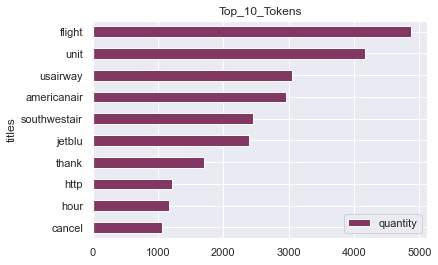

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | cancel       |       1065 |
|  6 | hour         |       1167 |
|  1 | http         |       1211 |
|  4 | thank        |       1703 |
|  9 | jetblu       |       2396 |
|  3 | southwestair |       2461 |
|  5 | americanair  |       2964 |
|  7 | usairway     |       3054 |
|  2 | unit         |       4166 |
|  8 | flight       |       4880 |
+----+--------------+------------+


In [14]:
Top10_OneSet(sample,"Top_10_Tokens","Top_10_Tokens")

['cancel', 'hour', 'thank', 'americanair', 'unit', 'southwestair', 'usairway', 'flight', 'http', 'jetblu']


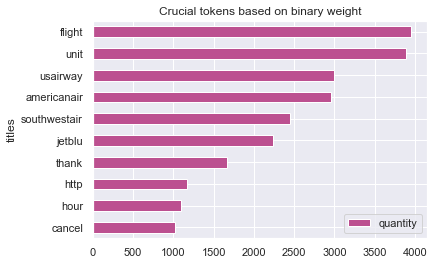

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | cancel       |       1019 |
|  1 | hour         |       1101 |
|  8 | http         |       1173 |
|  2 | thank        |       1661 |
|  9 | jetblu       |       2242 |
|  5 | southwestair |       2453 |
|  3 | americanair  |       2952 |
|  6 | usairway     |       2990 |
|  4 | unit         |       3882 |
|  7 | flight       |       3954 |
+----+--------------+------------+


In [15]:
Binary_weight(sample)

Display top 10 most important tokens
['cancel', 'help', 'southwestair', 'hour', 'thank', 'jetblu', 'unit', 'americanair', 'usairway', 'flight']


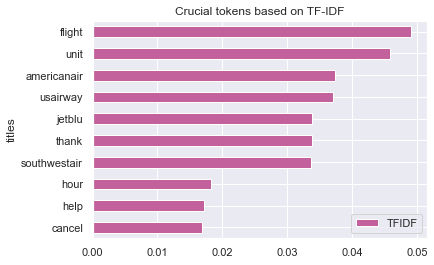

+----+--------------+-----------+
|    | titles       |     TFIDF |
|----+--------------+-----------|
|  0 | cancel       | 0.0168516 |
|  1 | help         | 0.0172254 |
|  3 | hour         | 0.0182554 |
|  2 | southwestair | 0.0336026 |
|  4 | thank        | 0.0338181 |
|  5 | jetblu       | 0.0338767 |
|  8 | usairway     | 0.0370091 |
|  7 | americanair  | 0.0374393 |
|  6 | unit         | 0.0459066 |
|  9 | flight       | 0.049147  |
+----+--------------+-----------+


In [16]:
TF_IDF(sample)

# Data exploration - distribution of tweets

Distribution of tweets depending on scores. 

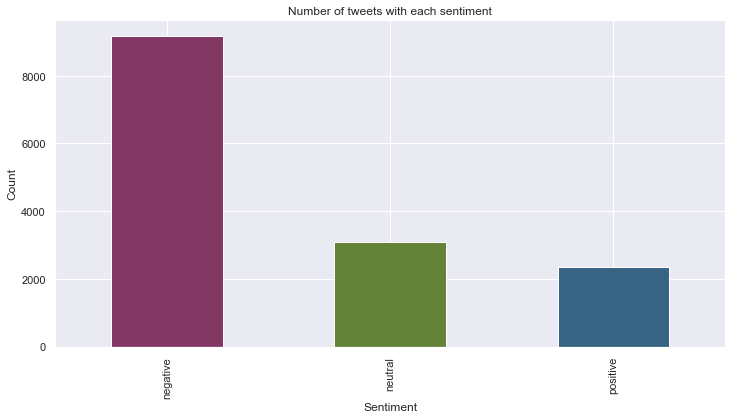

In [25]:
plt.figure(figsize=(12,6))
plt.title("Number of tweets with each sentiment")
colors = ['#833864','#648338','#386483']

dataset_titles['airline_sentiment'].value_counts().sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Wordcloud of all tweets

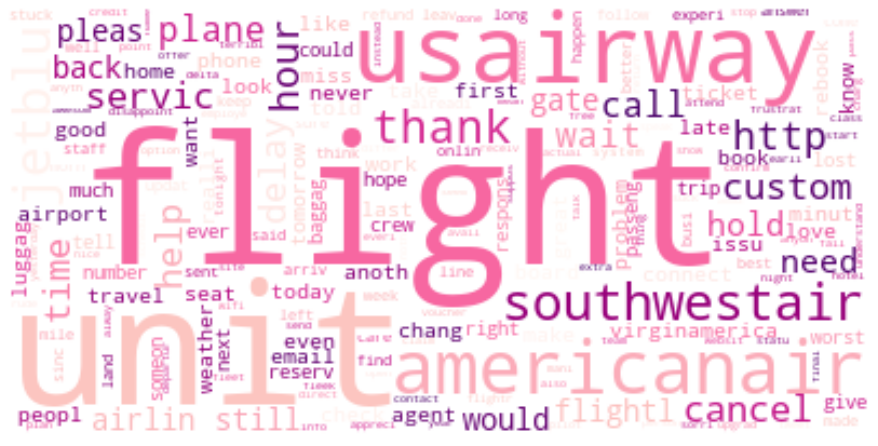

In [13]:
tokens_to_wordcloud = []
for a in dataset_titles.text:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='RdPu', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

## Extraction of text with negative sentiment

In [14]:
dataset_negative = dataset_titles.loc[(dataset_titles['airline_sentiment'] == "negative")]
print(dataset_negative.head())
sample_negative = dataset_negative['text']

   airline_sentiment                                               text
3           negative  @VirginAmerica it's really aggressive to blast...
4           negative  @VirginAmerica and it's a really big bad thing...
5           negative  @VirginAmerica seriously would pay $30 a fligh...
15          negative      @VirginAmerica SFO-PDX schedule is still MIA.
17          negative  @VirginAmerica  I flew from NYC to SFO last we...


# Wordcloud and Top10 of negative tweets

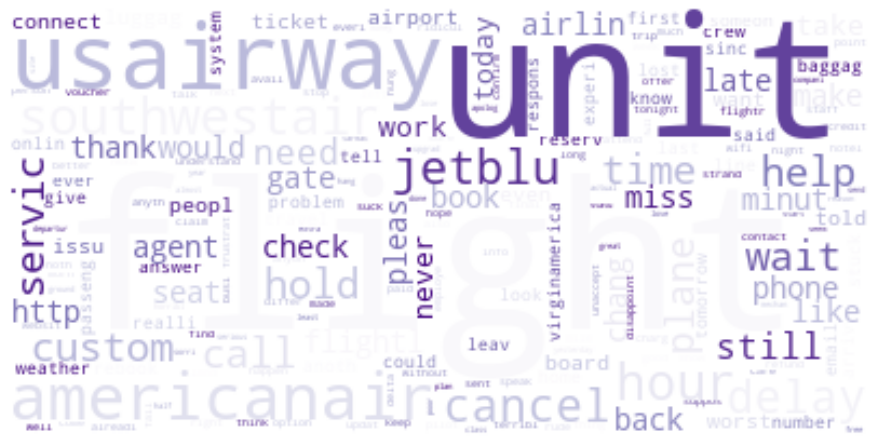

In [15]:
tokens_to_wordcloud = []
for a in dataset_negative.text:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='Purples', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

Display top 10 tokens
['custom', 'delay', 'jetblu', 'americanair', 'cancel', 'southwestair', 'hour', 'usairway', 'unit', 'flight']


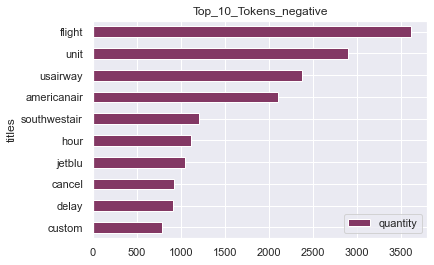

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | custom       |        785 |
|  1 | delay        |        917 |
|  4 | cancel       |        926 |
|  2 | jetblu       |       1053 |
|  6 | hour         |       1113 |
|  5 | southwestair |       1214 |
|  3 | americanair  |       2110 |
|  7 | usairway     |       2375 |
|  8 | unit         |       2899 |
|  9 | flight       |       3621 |
+----+--------------+------------+
['custom', 'delay', 'cancel', 'hour', 'southwestair', 'jetblu', 'americanair', 'usairway', 'flight', 'unit']


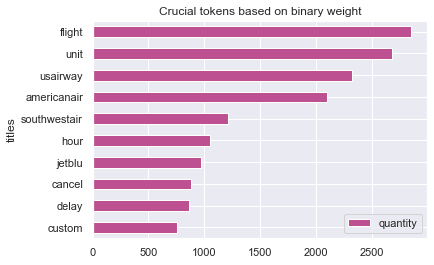

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | custom       |        754 |
|  1 | delay        |        859 |
|  2 | cancel       |        882 |
|  5 | jetblu       |        971 |
|  3 | hour         |       1047 |
|  4 | southwestair |       1208 |
|  6 | americanair  |       2100 |
|  7 | usairway     |       2324 |
|  9 | unit         |       2682 |
|  8 | flight       |       2853 |
+----+--------------+------------+
Display top 10 most important tokens
['servic', 'cancel', 'jetblu', 'hour', 'delay', 'southwestair', 'unit', 'usairway', 'flight', 'americanair']


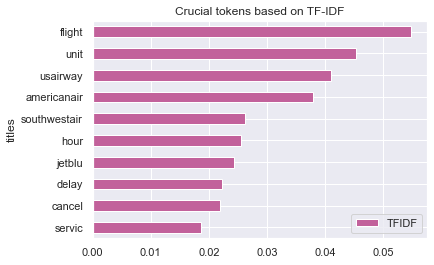

+----+--------------+-----------+
|    | titles       |     TFIDF |
|----+--------------+-----------|
|  0 | servic       | 0.0186658 |
|  1 | cancel       | 0.0218953 |
|  4 | delay        | 0.0222113 |
|  2 | jetblu       | 0.0244161 |
|  3 | hour         | 0.025585  |
|  5 | southwestair | 0.0261552 |
|  9 | americanair  | 0.0378818 |
|  7 | usairway     | 0.0410707 |
|  6 | unit         | 0.045357  |
|  8 | flight       | 0.0548556 |
+----+--------------+-----------+


In [19]:
Top10_OneSet(sample_negative,"Top_10_Tokens_negative","Top_10_negative")
Binary_weight(sample_negative)
TF_IDF(sample_negative)

## Extraction of text with neutral sentiment

In [16]:
dataset_neutral= dataset_titles.loc[(dataset_titles['airline_sentiment'] == "neutral")]
sample_neutral = dataset_neutral['text']
print(dataset_neutral)

      airline_sentiment                                               text
0               neutral                @VirginAmerica What @dhepburn said.
2               neutral  @VirginAmerica I didn't today... Must mean I n...
7               neutral  @VirginAmerica Really missed a prime opportuni...
10              neutral  @VirginAmerica did you know that suicide is th...
23              neutral  @VirginAmerica will you be making BOS&gt;LAS n...
...                 ...                                                ...
14607           neutral         @AmericanAir i need someone to help me out
14611           neutral  @AmericanAir guarantee no retribution? If so, ...
14632           neutral  “@AmericanAir: @TilleyMonsta George, that does...
14637           neutral  @AmericanAir Please bring American Airlines to...
14639           neutral  @AmericanAir we have 8 ppl so we need 2 know h...

[3099 rows x 2 columns]


# Wordcloud and Top10 of neutral tweets

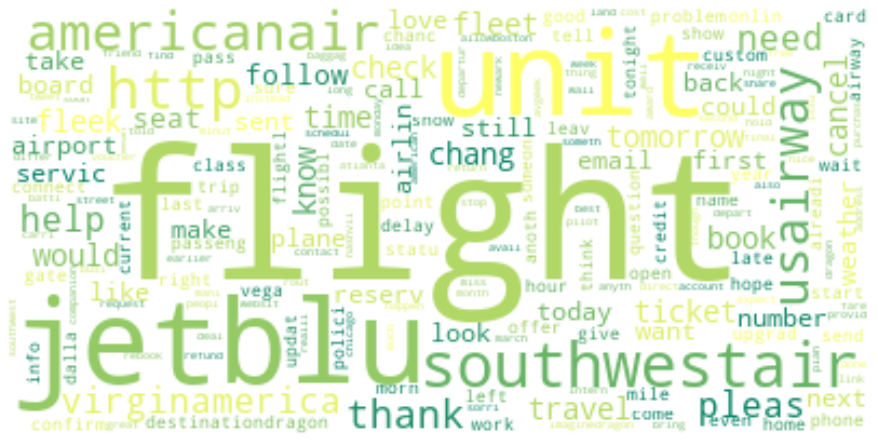

In [17]:
tokens_to_wordcloud = []
for a in dataset_neutral.text:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='summer', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

Display top 10 tokens
['pleas', 'need', 'http', 'southwestair', 'usairway', 'jetblu', 'unit', 'thank', 'flight', 'americanair']


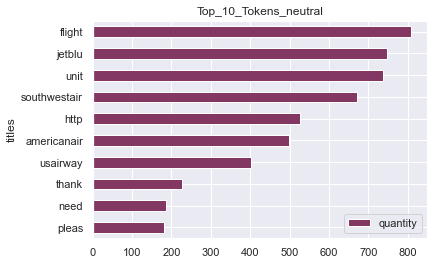

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | pleas        |        182 |
|  1 | need         |        186 |
|  7 | thank        |        227 |
|  4 | usairway     |        402 |
|  9 | americanair  |        499 |
|  2 | http         |        526 |
|  3 | southwestair |        671 |
|  6 | unit         |        738 |
|  5 | jetblu       |        748 |
|  8 | flight       |        809 |
+----+--------------+------------+
['pleas', 'thank', 'usairway', 'need', 'http', 'jetblu', 'southwestair', 'flight', 'americanair', 'unit']


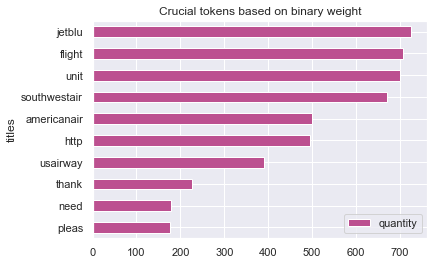

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | pleas        |        176 |
|  3 | need         |        179 |
|  1 | thank        |        226 |
|  2 | usairway     |        391 |
|  4 | http         |        496 |
|  8 | americanair  |        499 |
|  6 | southwestair |        671 |
|  9 | unit         |        701 |
|  7 | flight       |        706 |
|  5 | jetblu       |        726 |
+----+--------------+------------+
Display top 10 most important tokens
['virginamerica', 'pleas', 'thank', 'http', 'usairway', 'flight', 'unit', 'jetblu', 'southwestair', 'americanair']


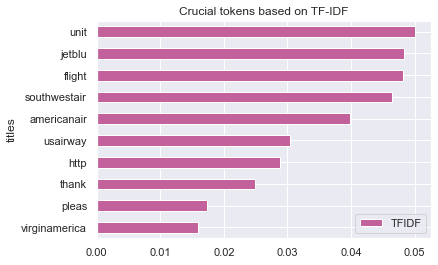

+----+---------------+-----------+
|    | titles        |     TFIDF |
|----+---------------+-----------|
|  0 | virginamerica | 0.0159802 |
|  1 | pleas         | 0.0173455 |
|  2 | thank         | 0.0249891 |
|  3 | http          | 0.0288311 |
|  4 | usairway      | 0.0304896 |
|  9 | americanair   | 0.0398105 |
|  8 | southwestair  | 0.0463873 |
|  5 | flight        | 0.0481222 |
|  7 | jetblu        | 0.0482944 |
|  6 | unit          | 0.0501422 |
+----+---------------+-----------+


In [21]:
Top10_OneSet(sample_neutral,"Top_10_Tokens_neutral","Top_10_neutral")
Binary_weight(sample_neutral)
TF_IDF(sample_neutral)

## Extraction of text with positive sentiment

In [21]:
dataset_positive= dataset_titles.loc[(dataset_titles['airline_sentiment'] == "positive")]
sample_positive = dataset_positive['text']
print(dataset_positive)

      airline_sentiment                                               text
1              positive  @VirginAmerica plus you've added commercials t...
6              positive  @VirginAmerica yes, nearly every time I fly VX...
8              positive    @virginamerica Well, I didn't…but NOW I DO! :-D
9              positive  @VirginAmerica it was amazing, and arrived an ...
11             positive  @VirginAmerica I &lt;3 pretty graphics. so muc...
...                 ...                                                ...
14623          positive  @AmericanAir Love the new planes for the JFK-L...
14625          positive  @AmericanAir Flight 236 was great. Fantastic c...
14628          positive  Thank you. “@AmericanAir: @jlhalldc Customer R...
14630          positive                        @AmericanAir Thanks! He is.
14635          positive  @AmericanAir thank you we got on a different f...

[2363 rows x 2 columns]


# Wordcloud and Top10 for positive tweets

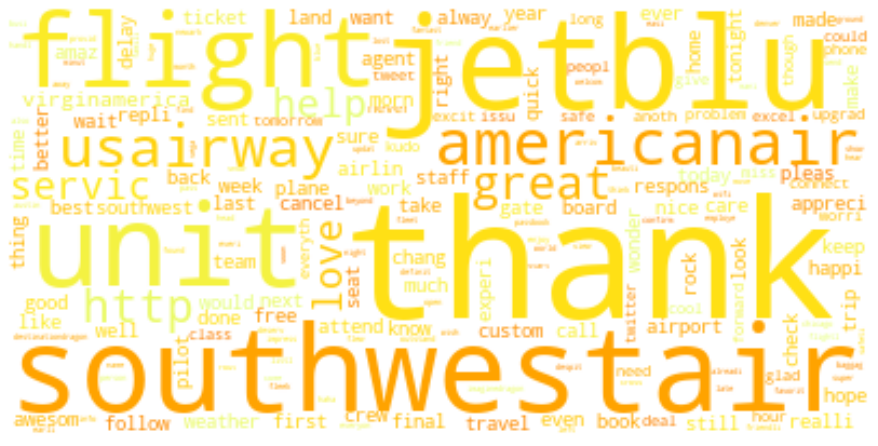

In [20]:
tokens_to_wordcloud = []
for a in dataset_positive.text:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='Wistia', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

Display top 10 tokens
['love', 'americanair', 'unit', 'great', 'flight', 'usairway', 'http', 'southwestair', 'jetblu', 'thank']


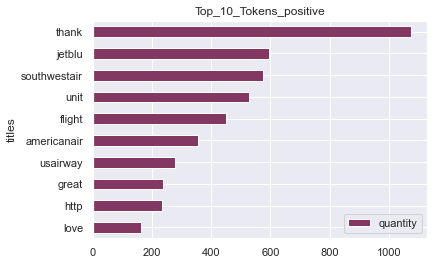

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | love         |        165 |
|  6 | http         |        233 |
|  3 | great        |        236 |
|  5 | usairway     |        277 |
|  1 | americanair  |        355 |
|  4 | flight       |        450 |
|  2 | unit         |        529 |
|  7 | southwestair |        576 |
|  8 | jetblu       |        595 |
|  9 | thank        |       1076 |
+----+--------------+------------+
['love', 'americanair', 'usairway', 'great', 'http', 'flight', 'thank', 'southwestair', 'jetblu', 'unit']


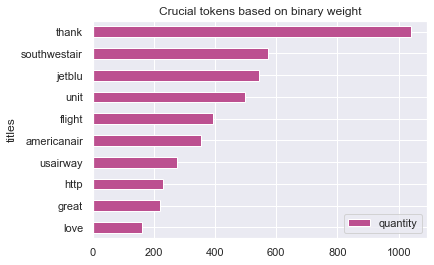

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | love         |        161 |
|  3 | great        |        220 |
|  4 | http         |        229 |
|  2 | usairway     |        275 |
|  1 | americanair  |        353 |
|  5 | flight       |        395 |
|  9 | unit         |        499 |
|  8 | jetblu       |        545 |
|  7 | southwestair |        574 |
|  6 | thank        |       1042 |
+----+--------------+------------+
Display top 10 most important tokens
['virginamerica', 'http', 'great', 'flight', 'usairway', 'southwestair', 'americanair', 'unit', 'jetblu', 'thank']


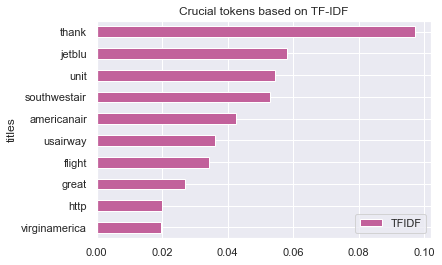

+----+---------------+-----------+
|    | titles        |     TFIDF |
|----+---------------+-----------|
|  0 | virginamerica | 0.0197727 |
|  1 | http          | 0.0199226 |
|  2 | great         | 0.0269651 |
|  3 | flight        | 0.0344188 |
|  4 | usairway      | 0.0361685 |
|  6 | americanair   | 0.0426926 |
|  5 | southwestair  | 0.0529094 |
|  7 | unit          | 0.0544579 |
|  8 | jetblu        | 0.0579983 |
|  9 | thank         | 0.0973599 |
+----+---------------+-----------+


In [24]:
Top10_OneSet(sample_positive,"Top_10_Tokens_positive","Top_10_positive")
Binary_weight(sample_positive)
TF_IDF(sample_positive)

## Distribution of dataset

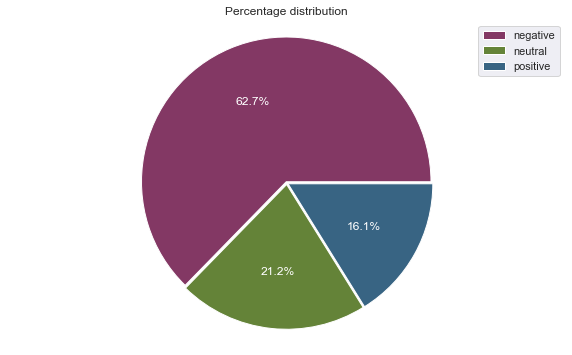

In [26]:
plt.figure(figsize=(10,6))
explode = (0.01,0.01, 0.01)
plt.pie([len(dataset_negative),len(dataset_neutral), len(dataset_positive)], colors=colors, labels=['negative','neutral', 'positive'],autopct='%.1f%%', textprops={'color':"w"}, explode = explode)
plt.legend(loc='upper right')
plt.axis('equal')
plt.title("Percentage distribution")
plt.show()

#### We can see that several of the same tokens occur in all sentiments so I will now focus on extracting the most frequent tokens only in specific sets, such tokens that do not occur in the other sets.

## Visualization of top10 tokens ONLY in positive tweets

Display top 10 tokens


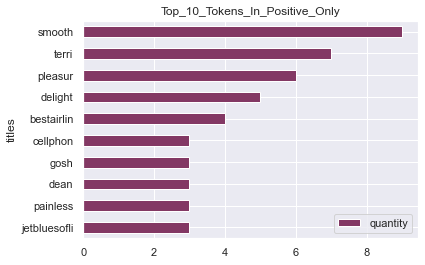

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | jetbluesofli |          3 |
|  1 | painless     |          3 |
|  2 | dean         |          3 |
|  3 | gosh         |          3 |
|  4 | cellphon     |          3 |
|  5 | bestairlin   |          4 |
|  7 | delight      |          5 |
|  6 | pleasur      |          6 |
|  8 | terri        |          7 |
|  9 | smooth       |          9 |
+----+--------------+------------+


In [37]:
Top10onlyInA(sample_positive,pd.concat([sample_neutral, sample_negative]),"Top_10_Tokens_In_Positive_Only","Top_10_Positive_Only")

## Visualization of top10 tokens ONLY in Negative tweets

Display top 10 tokens


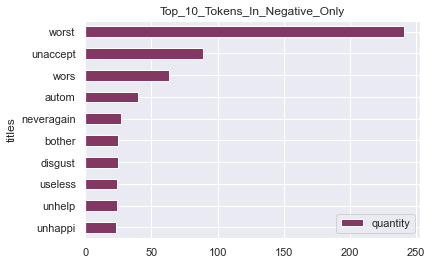

+----+------------+------------+
|    | titles     |   quantity |
|----+------------+------------|
|  0 | unhappi    |         23 |
|  1 | unhelp     |         24 |
|  2 | useless    |         24 |
|  5 | disgust    |         25 |
|  8 | bother     |         25 |
|  7 | neveragain |         27 |
|  6 | autom      |         40 |
|  3 | wors       |         63 |
|  9 | unaccept   |         89 |
|  4 | worst      |        241 |
+----+------------+------------+


In [38]:
Top10onlyInA(sample_negative,pd.concat([sample_neutral, sample_positive]),"Top_10_Tokens_In_Negative_Only","Top_10_Negative_Only")

Looking only at the top10 tokens, it can be immediately deduced that these tweets belong to the negative ones, due to the negative bias of the words appearing in the top10.

## Visualization of top10 tokens ONLY in Neutral tweets

Display top 10 tokens


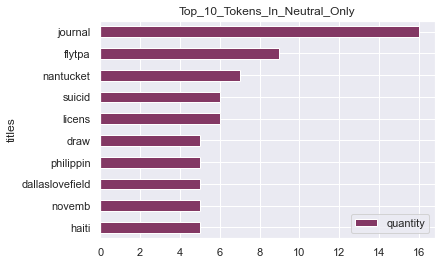

+----+-----------------+------------+
|    | titles          |   quantity |
|----+-----------------+------------|
|  0 | haiti           |          5 |
|  1 | novemb          |          5 |
|  2 | dallaslovefield |          5 |
|  4 | philippin       |          5 |
|  5 | draw            |          5 |
|  3 | licens          |          6 |
|  6 | suicid          |          6 |
|  7 | nantucket       |          7 |
|  9 | flytpa          |          9 |
|  8 | journal         |         16 |
+----+-----------------+------------+


In [39]:
Top10onlyInA(sample_neutral,pd.concat([sample_positive, sample_negative]),"Top_10_Tokens_In_Neutral_Only","Top_10_Neutral_Only")